# Design of yeast/E. coli shuttle vector pTA1

The pTA1 was made by in-vivo homologous recombination between five DNA fragments 
carrying 30 bp long flanking recombination sequences (s1 - s5).

              s1
     -|ampR|30
    |       \/                                           
    |       /\       s2                                  
    |       30|pBR|30
    |              \/
    |              /\        s3
    |              30|_2µ_|30
    |                      \/
    |                      /\        s4
    |                      30|LEU2|30
    |                              \/
    |                              /\        s5
    |                              30|CRPΔ|30
    |                                      \/
    |                                      /\
    |                                      30-
    |                                         |
     -----------------------------------------

| Designation | Sequence                       |
|-------------|--------------------------------|
| s1          | AATCCAATCAGCGTAAGGTGTAGACTTTCT |
| s2          | ATCGTATCTGCTGCGTAAATAGTAGTCAAC |
| s3          | TAAAATCTCGTAAAGGAACTGTCTGCTCTG |
| s4          | AACTGTAAAATCAGGTATCTCGTAGTCCGT |
| s5          | GAAAAGCGTTTACCTCGGAACTCTATTGTA |



| Primer             | Sequence                                                  |
|--------------------|-----------------------------------------------------------|
| 980_Leu2.FW        | TAAAATCTCGTAAAGGAACTGTCTGCTCTGTTAACTGTGGGAATACTC          |
| 979_Leu2.REV       | ACGGACTACGAGATACCTGATTTTACAGTTTCTACCCTATGAACATATTC        |
| 1113_Amp.fw.nw     | GAAAAGCGTTTACCTCGGAACTCTATTGTAGAACCCCTATTTGTTTATTTTTCTA   |
| 987_Amp.REV        | AGAAAGTCTACACCTTACGCTGATTGGATTTGAAGTTTTAAATCAATCTAAA      |
| 1196_Pbr.FW        | AATCCAATCAGCGTAAGGTGTAGACTTTCTCTGTCAGACCAAGTTTACT         |
| 1195_Pbr.REV       | GTTGACTACTATTTACGCAGCAGATACGATCTCGTTTCATCGGT              |
| 978_Crp.FW         | AACTGTAAAATCAGGTATCTCGTAGTCCGTGTTCTGATCCTCGAGC            |
| 977_Crp.REV        | TACAATAGAGTTCCGAGGTAAACGCTTTTCGTTCTTGTCTCATTGCC           |
| 984_Micron.FW      | ATCGTATCTGCTGCGTAAATAGTAGTCAACGATCGTACTTGTTACCCAT         |
| 983_Micron.REV     | CAGAGCAGACAGTTCCTTTACGAGATTTTAGATCCAATATCAAAGGAA          |



from pydna.all import *

In [1]:
parts = []

In [2]:
from pydna.all import *

# AmpR

Source: pUG35

Here I will try to elucidate what would constitute a minimum functional ampicillin resistance gene (ampR). 

I will try to extract this information from the features of selected Genbank files and sequence alignments.

There is an amp gene in the widely used [pBR322](https://www.ncbi.nlm.nih.gov/nuccore/J01749) vector.

In [3]:
# pBR322 = genbank("J01749.1")
# pBR322.write("pBR322.gb")
pBR322 = read("pBR322.gb")

In [4]:
assert pBR322.cseguid() == "5vBUdkLAnsJe0nwUsivmKmiZNAc"

In [5]:
pBR322.list_features()

Ft#,Label or Note,Dir,Sta,End,Len,type,orf?
0,nd,-->,0,4361,4361,source,no
1,nd,-->,0,1762,1762,source,no
2,nd,-->,23,27,4,misc_binding,no
3,N:promoter P1 (6,<--,26,33,7,regulatory,no
4,nd,-->,38,42,4,misc_binding,no
5,N:promoter P2 (6,-->,42,49,7,regulatory,no
6,nd,-->,52,56,4,misc_binding,no
7,nd,-->,66,70,4,misc_binding,no
8,nd,-->,79,83,4,misc_binding,no
9,nd,-->,85,1276,1191,gene,yes


The ampR coding sequence CDS is in feature 37 and 38 positioned at 3292..4153 on the crick strand (above).

Immediately upstream, there is a Shine-Dalgarno sequence (feature 41) and a "promoter p3" (feature 42 positioned 4187..4194)

The comment section of the pBR322 file (J01749.1) file contains the following:

    Promoters P1 and P3 are for the beta-lactamase gene. P3 is the 
    natural promoter, and P1 is artificially created by the ligation 
    of two different DNA fragments to create pBR322. 
    
    P2 is in the same region as P1, but it is on the opposite strand and
    initiates transcription in the direction of the tetracycline
    resistance gene.
    
It seems like a combination of promoter P3 and the ampR coding sequence should be sufficient to have expression.

The p3 promoter starts at 4194 and the coding sequence ends at 3292 in the pBR322 sequence.

This does *not* inlude a terminator.

In [6]:
P3_amp_pBR322 = pBR322[3292:4194].rc()

In [7]:
assert P3_amp_pBR322.useguid() == 'b6Nh5K2cAXPnaYJr8_cXC48_udg'

In [8]:
len(P3_amp_pBR322)

902

In [9]:
print(P3_amp_pBR322.seq)

AACCCTGATAAATGCTTCAATAATATTGAAAAAGGAAGAGTATGAGTATTCAACATTTCCGTGTCGCCCTTATTCCCTTTTTTGCGGCATTTTGCCTTCCTGTTTTTGCTCACCCAGAAACGCTGGTGAAAGTAAAAGATGCTGAAGATCAGTTGGGTGCACGAGTGGGTTACATCGAACTGGATCTCAACAGCGGTAAGATCCTTGAGAGTTTTCGCCCCGAAGAACGTTTTCCAATGATGAGCACTTTTAAAGTTCTGCTATGTGGCGCGGTATTATCCCGTGTTGACGCCGGGCAAGAGCAACTCGGTCGCCGCATACACTATTCTCAGAATGACTTGGTTGAGTACTCACCAGTCACAGAAAAGCATCTTACGGATGGCATGACAGTAAGAGAATTATGCAGTGCTGCCATAACCATGAGTGATAACACTGCGGCCAACTTACTTCTGACAACGATCGGAGGACCGAAGGAGCTAACCGCTTTTTTGCACAACATGGGGGATCATGTAACTCGCCTTGATCGTTGGGAACCGGAGCTGAATGAAGCCATACCAAACGACGAGCGTGACACCACGATGCCTGCAGCAATGGCAACAACGTTGCGCAAACTATTAACTGGCGAACTACTTACTCTAGCTTCCCGGCAACAATTAATAGACTGGATGGAGGCGGATAAAGTTGCAGGACCACTTCTGCGCTCGGCCCTTCCGGCTGGCTGGTTTATTGCTGATAAATCTGGAGCCGGTGAGCGTGGGTCTCGCGGTATCATTGCAGCACTGGGGCCAGATGGTAAGCCCTCCCGTATCGTAGTTATCTACACGACGGGGAGTCAGGCAACTATGGATGAACGAAATAGACAGATCGCTGAGATAGGTGCCTCACTGATTAAGCATTGGTAA


The ampicillin marker gene ampR comes originally from the [TN3 transposon](https://en.wikipedia.org/wiki/Tn3_transposon).
The TN3 sequence is available from Genbank [V00613.1](http://www.ncbi.nlm.nih.gov/nuccore/43710).

In [10]:
# TN3 = genbank("V00613.1")
# TN3.write("TN3.gb")

TN3 = read("TN3.gb")

In [11]:
TN3.list_features()

Ft#,Label or Note,Dir,Sta,End,Len,type,orf?
0,nd,-->,0,4957,4957,source,no
1,N:inverted repea,-->,0,38,38,misc_feature,no
2,nd,<--,33,3081,3048,CDS,no
3,nd,-->,3209,3767,558,CDS,yes
4,nd,-->,3949,4810,861,CDS,yes
5,N:inverted repea,-->,4919,4957,38,misc_feature,no


The feature # 4 in the table above is the ampR open reading frame of 861 bp. Unfortunately, there is no information regarding the promoter in this file.

[Mandecki 1990](http://www.ncbi.nlm.nih.gov/pubmed/2227445) describe a series of compact plasmids pWM521, pWM528 and pWM529. The pWM521 is only 1993 bp long, compared to 2686 bp for the pUC19.  

Mandecki et al. refer to [Brosius 1982](Brosius1982.pdf) for the precise location of the P3 promoter that is the important one transcribing the ampR gene. 

Figure 5 (below) from Brosius 1982 show a -35 and a -10 region for the P3 promoter. The -35 region was marked by a blue line.

![fig5](Brosius1982_fig5.png)

Comparing the information from Brosius 1982 with the pBR322 sequence file, it is obvious that the P3 feature in pBR322 is only a partial -10 region and that the -35 region is not marked as a feature in the pBR322 sequence.

The -35 and -10 regions were added as features `P3-35_Brosius_1982` and `P3-10_Brosius_1982` in the [pBR322_Brosius_1982.gb](pBR322_Brosius_1982.gb) file.


The pWM521 plasmid is available from genbank [M34519.1](https://www.ncbi.nlm.nih.gov/nuccore/M34519.1). Another very short plasmid containing the ampR gene is pUCmu (1669 bp) [pUCmu.gb](https://www.ncbi.nlm.nih.gov/nuccore/LT827034.1).

In [12]:
# pWM521 = genbank("M34519.1")
# pWM521 = pWM521.looped()
# pWM521.write("pWM521.gb")
pWM521 = read("pWM521.gb")

In [13]:
pWM521.list_features()

Ft#,Label or Note,Dir,Sta,End,Len,type,orf?
0,nd,-->,0,1993,1993,source,no
1,N:lacZ fragment,-->,80,327,247,misc_feature,no
2,N:b-galactosidas,-->,118,301,183,CDS,yes
3,N:SmaI site for,-->,135,137,2,misc_feature,no
4,N:trpA terminato,-->,300,336,36,regulatory,no
5,N:bla promoter P,-->,336,402,66,regulatory,no
6,nd,-->,402,1329,927,mRNA,no
7,N:b-lactamase,-->,437,1298,861,CDS,yes
8,N:phage fd termi,-->,1298,1342,44,regulatory,no
9,N:RNAII promoter,-->,1342,1408,66,regulatory,no


The feature 5 is the P3 promoter and the feature 7 is the amp cds.

The feature indicating amp in pMW521 starts 101 bp upstream of the amp reading frame. This is 60 bp upstream of the promoter P3 feature in pBR322.

In [14]:
# pUCmu = genbank("LT827034.1")
# pUCmu = pUCmu.looped()
# pUCmu.write("pUCmu.gb")
pUCmu = read("pUCmu.gb")

pUCmu contains essentially the same 861 bp ORF (Ft#3) as pWM521. The pUCmu sequence file does not contain 
any suggestion of where the amp promoter (P3) starts.

[T-Coffee](http://tcoffee.crg.cat) was used to make a multiple sequence alignment (MSA) of the relevant sequences from:

- pBR322
- pUCmu
- pWM521
- TN3

The files were saved in the file [tcoffee-all-files-17cb336a.zip](tcoffee-all-files-17cb336a.zip).

This alignment revealed that the shortest ampR promoter+gene is in pUCmu and it starts with `TATGTATCCGCTCATG` including about half of the -35 sequence according to Brosius 1982.

![MSA4.png](MSA4.png)


Removing the `pUCMu` and aligning again with the three remaining sequences yield a longer shared sequence starting with `CCCCTATT`.

![MSA3.png](MSA3.png)

I decided for safety that I will use the consensus sequence of the aligment with three sequences as building block for the amp functionality.

I decided to use the consensus sequence (starting at `CCCCTATT`) and three nucleotides upstream to avoid a primer sequence ending with a run of c's. 

I added 50 nt in the other end to include a terminator.

This sequence was added to pBR322_minimal_ampR.gb as the feature "selected".

In [15]:
pBR322_minimal_ampR = read("pBR322_minimal_ampR.gb")

In [16]:
assert pBR322_minimal_ampR.useguid() == 'ZGXCZFNKnoJ-KRQEeCcic6Oc5aA'

In [17]:
amp_candidate = pBR322_minimal_ampR.extract_feature(0)

In [18]:
len(amp_candidate)

1012

In [19]:
assert amp_candidate.useguid() == 'GtfCmx5cmO26hI6lgf_CLNErgUo'

In [20]:
print(amp_candidate.seq)

GAACCCCTATTTGTTTATTTTTCTAAATACATTCAAATATGTATCCGCTCATGAGACAATAACCCTGATAAATGCTTCAATAATATTGAAAAAGGAAGAGTATGAGTATTCAACATTTCCGTGTCGCCCTTATTCCCTTTTTTGCGGCATTTTGCCTTCCTGTTTTTGCTCACCCAGAAACGCTGGTGAAAGTAAAAGATGCTGAAGATCAGTTGGGTGCACGAGTGGGTTACATCGAACTGGATCTCAACAGCGGTAAGATCCTTGAGAGTTTTCGCCCCGAAGAACGTTTTCCAATGATGAGCACTTTTAAAGTTCTGCTATGTGGCGCGGTATTATCCCGTGTTGACGCCGGGCAAGAGCAACTCGGTCGCCGCATACACTATTCTCAGAATGACTTGGTTGAGTACTCACCAGTCACAGAAAAGCATCTTACGGATGGCATGACAGTAAGAGAATTATGCAGTGCTGCCATAACCATGAGTGATAACACTGCGGCCAACTTACTTCTGACAACGATCGGAGGACCGAAGGAGCTAACCGCTTTTTTGCACAACATGGGGGATCATGTAACTCGCCTTGATCGTTGGGAACCGGAGCTGAATGAAGCCATACCAAACGACGAGCGTGACACCACGATGCCTGCAGCAATGGCAACAACGTTGCGCAAACTATTAACTGGCGAACTACTTACTCTAGCTTCCCGGCAACAATTAATAGACTGGATGGAGGCGGATAAAGTTGCAGGACCACTTCTGCGCTCGGCCCTTCCGGCTGGCTGGTTTATTGCTGATAAATCTGGAGCCGGTGAGCGTGGGTCTCGCGGTATCATTGCAGCACTGGGGCCAGATGGTAAGCCCTCCCGTATCGTAGTTATCTACACGACGGGGAGTCAGGCAACTATGGATGAACGAAATAGACAGATCGCTGAGATAGGTGCCTCACTGATTAAGCATTGGTAACTGTCAGACCAAGTTTACTCATATATACTTTAGATTGA

In [21]:
from pydna.parsers import parse_primers

p = {}

p[1113], p[987] = parse_primers('''

>1113_Amp.fw.nw
GAAAAGCGTTTACCTCGGAACTCTATTGTAGAACCCCTATTTGTTTATTTTTCTA

>987_Amp.REV  Amp.REV
AGAAAGTCTACACCTTACGCTGATTGGATTTGAAGTTTTAAATCAATCTAAA

''')

In [22]:
pUG35 = read("pUG35.gb")

In [23]:
amp = pcr(p[1113],p[987], pUG35)

In [24]:
# assert str(amp_candidate.seq) in amp

In [25]:
amp.figure()

                              5TGAAGTTTTAAATCAATCTAAA...TAGAAAAATAAACAAATAGGGGTTC3
                                                        |||||||||||||||||||||||||
                                                       3ATCTTTTTATTTGTTTATCCCCAAGATGTTATCTCAAGGCTCCATTTGCGAAAAG5
5AGAAAGTCTACACCTTACGCTGATTGGATTTGAAGTTTTAAATCAATCTAAA3
                               ||||||||||||||||||||||
                              3ACTTCAAAATTTAGTTAGATTT...ATCTTTTTATTTGTTTATCCCCAAG5

In [26]:
print(amp.seq)

AGAAAGTCTACACCTTACGCTGATTGGATTTGAAGTTTTAAATCAATCTAAAGTATATATGAGTAAACTTGGTCTGACAGTTACCAATGCTTAATCAGTGAGGCACCTATCTCAGCGATCTGTCTATTTCGTTCATCCATAGTTGCCTGACTCCCCGTCGTGTAGATAACTACGATACGGGAGGGCTTACCATCTGGCCCCAGTGCTGCAATGATACCGCGAGACCCACGCTCACCGGCTCCAGATTTATCAGCAATAAACCAGCCAGCCGGAAGGGCCGAGCGCAGAAGTGGTCCTGCAACTTTATCCGCCTCCATCCAGTCTATTAATTGTTGCCGGGAAGCTAGAGTAAGTAGTTCGCCAGTTAATAGTTTGCGCAACGTTGTTGCCATTGCTACAGGCATCGTGGTGTCACGCTCGTCGTTTGGTATGGCTTCATTCAGCTCCGGTTCCCAACGATCAAGGCGAGTTACATGATCCCCCATGTTGTGCAAAAAAGCGGTTAGCTCCTTCGGTCCTCCGATCGTTGTCAGAAGTAAGTTGGCCGCAGTGTTATCACTCATGGTTATGGCAGCACTGCATAATTCTCTTACTGTCATGCCATCCGTAAGATGCTTTTCTGTGACTGGTGAGTACTCAACCAAGTCATTCTGAGAATAGTGTATGCGGCGACCGAGTTGCTCTTGCCCGGCGTCAATACGGGATAATACCGCGCCACATAGCAGAACTTTAAAAGTGCTCATCATTGGAAAACGTTCTTCGGGGCGAAAACTCTCAAGGATCTTACCGCTGTTGAGATCCAGTTCGATGTAACCCACTCGTGCACCCAACTGATCTTCAGCATCTTTTACTTTCACCAGCGTTTCTGGGTGAGCAAAAACAGGAAGGCAAAATGCCGCAAAAAAGGGAATAAGGGCGACACGGAAATGTTGAATACTCATACTCTTCCTTTTTCAATATTATTGAAGCATTTATCAGGGTTATTGTCTCATGAGCGGAT

In [27]:
amp.name = "ampR"

In [28]:
parts.append(amp)

# pBR 

Origin of Replication for E. coli

Source: pBR322

The pBR322 ori instead of the pUC ori should lower the copy number in E.coli.
Maybe this will improve plasmid stability of plasmids when maintained in E. coli.

The low copy number of the pBR322 compared to the pUC19 is partly due to the rop gene (see figure below).

![](pBR322.jpg)

According to the figure above a 1915 - 3133 fragment should include both the rep and rop genes. 
It is not clear if this fragment includes the promoter for the ROP gene.

Most fragments used in plasmids are large, It should be sufficient to add the fragment from 
the end of the amp gene (3292) to ~50 bp before the shine delgarno sequence of the rop gene (1905).


References:

[Addgene blog post on origins of replication](http://blog.addgene.org/plasmid-101-origin-of-replication) 

[bitesizebio article on plasmid origins of replications](http://bitesizebio.com/21466/article-series-e-coli-plasmid-origins-of-replication-the-origin)

[A page explaining the mechanism of plasmid copy number regulation](http://www.sci.sdsu.edu/~smaloy/MicrobialGenetics/topics/plasmids/plasmid-repln.html)

There are several origins of replication available from iGEM:
[igem replication_origins](http://parts.igem.org/DNA/Replication_origins)

In [29]:
#pBR322 = genbank("J01749.1")
#pBR322.write("pBR322.gb")
pBR322 = read("pBR322.gb")

In [30]:
assert pBR322.cseguid() == '5vBUdkLAnsJe0nwUsivmKmiZNAc'

In [31]:
pbr_section = pBR322[1905-50:3292].reverse_complement()
pbr_section

Dseqrecord(-1437)

The direction of the fragment saved below is the forward direction given in pBR322, so it is the reverse complement of a fragment of the pBR322 database sequence.

In [32]:
from pydna.parsers import parse_primers

p = {}

p[1196], p[1195] = parse_primers('''

>1196_Pbr.FW
AATCCAATCAGCGTAAGGTGTAGACTTTCTCTGTCAGACCAAGTTTACT

>1195_Pbr.REV
GTTGACTACTATTTACGCAGCAGATACGATCTCGTTTCATCGGT

''')

In [33]:
pBR = pcr(p[1196], p[1195], pbr_section)

In [34]:
assert str(pbr_section.seq) in pBR

In [35]:
pBR.figure()

                              5CTGTCAGACCAAGTTTACT...ACCGATGAAACGAG3
                                                     ||||||||||||||
                                                    3TGGCTACTTTGCTCTAGCATAGACGACGCATTTATCATCAGTTG5
5AATCCAATCAGCGTAAGGTGTAGACTTTCTCTGTCAGACCAAGTTTACT3
                               |||||||||||||||||||
                              3GACAGTCTGGTTCAAATGA...TGGCTACTTTGCTC5

In [36]:
print(pBR.seq)

AATCCAATCAGCGTAAGGTGTAGACTTTCTCTGTCAGACCAAGTTTACTCATATATACTTTAGATTGATTTAAAACTTCATTTTTAATTTAAAAGGATCTAGGTGAAGATCCTTTTTGATAATCTCATGACCAAAATCCCTTAACGTGAGTTTTCGTTCCACTGAGCGTCAGACCCCGTAGAAAAGATCAAAGGATCTTCTTGAGATCCTTTTTTTCTGCGCGTAATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTCCTTCTAGTGTAGCCGTAGTTAGGCCACCACTTCAAGAACTCTGTAGCACCGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACTCAAGACGATAGTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCTTGGAGCGAACGACCTACACCGAACTGAGATACCTACAGCGTGAGCTATGAGAAAGCGCCACGCTTCCCGAAGGGAGAAAGGCGGACAGGTATCCGGTAAGCGGCAGGGTCGGAACAGGAGAGCGCACGAGGGAGCTTCCAGGGGGAAACGCCTGGTATCTTTATAGTCCTGTCGGGTTTCGCCACCTCTGACTTGAGCGTCGATTTTTGTGATGCTCGTCAGGGGGGCGGAGCCTATGGAAAAACGCCAGCAACGCGGCCTTTTTACGGTTCCTGGCCTTTTGCTGGCCTTTTGCTCACATGTTCTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCCTTTGAGTGAGCTGATACCGCTCGCCGCAGCCGAACGACCGAGCGCAGCGAGTCAGTGAGCGAGGAAGCGGAAGAGCGCCTGATGCGGTATTTTCTCCTTACGC

In [37]:
pBR.name = "pBR"

In [38]:
parts.append(pBR)

# 2µ 

2 micron origin of replication for yeast

Source: YEplac112

The cells below is an attempt to define the smallest 2µ sequence that would reliably replicate a plasmid in Saccharomyces cerevisiae.

The 2 micron origin comes from the 2 micron circle that can be found in Genbank record: [J01347.1](http://www.ncbi.nlm.nih.gov/nuccore/J01347.1).

In [39]:
# twomicron = genbank("J01347.1")
# twomicron.write("2micron.gb")
twomicron_section = read("2micron.gb")

The 2µ sequence used in pYPKpw comes from the pSU0 plasmid:

![](pSU0.png)



The sequence is available [here](https://www.ncbi.nlm.nih.gov/nuccore/AB215109.1). 





[paper](https://www.ncbi.nlm.nih.gov/pubmed/16454044)

In [40]:
# pSU0 = genbank("AB215109.1")
# pSU0.write("pSU0.gb")
pSU0 = read("pSU0_2µ.gb")

In [41]:
assert pSU0.cseguid() == 'fzXVMVR4-lIsvU_eXXMG10U18s4'

The shared sequence between the 2 micron plasmid and the pSU0 was indicated in the pSU0_2µ.gb file as feature "2micron".

It turns out that the 2 micron sequences in YEplac112 is 321 bp shorter than in pSU0:

    aattccacggactatagacta ................... gcaatgtttgtggaagcggtattcgcaat  1439 bp  pSU0

                    atcgtacttgttacccatca .... gcaatgtttgtggaagcggtattcgcaat  1117 bp  YEplac112
    
Primers were designed for the YEplac112 sequence as it is short and still works.

In [42]:
from pydna.parsers import parse_primers

p = {}

p[984], p[983] = parse_primers('''

>984_Micron.FW  Micron.FW
ATCGTATCTGCTGCGTAAATAGTAGTCAACGATCGTACTTGTTACCCAT

>983_Micron.REV  Micron.REV
CAGAGCAGACAGTTCCTTTACGAGATTTTAGATCCAATATCAAAGGAA

''')

In [43]:
# YEplac112 = genbank("X75458.1")
# YEplac112.write("YEplac112.gb")
YEplac112 = read("YEplac112.gb").looped()

In [44]:
YEplac112.cseguid()

'SNqGOdhCuREZADkT4E-PmR4DvU8'

The primers were designed for the YEplac112 sequence:

In [45]:
two_micron = pcr(p[984], p[983], YEplac112)

In [46]:
two_micron.figure()

                              5GATCGTACTTGTTACCCAT...TTCCTTTGATATTGGATC3
                                                     ||||||||||||||||||
                                                    3AAGGAAACTATAACCTAGATTTTAGAGCATTTCCTTGACAGACGAGAC5
5ATCGTATCTGCTGCGTAAATAGTAGTCAACGATCGTACTTGTTACCCAT3
                               |||||||||||||||||||
                              3CTAGCATGAACAATGGGTA...AAGGAAACTATAACCTAG5

In [47]:
print(two_micron.seq)

ATCGTATCTGCTGCGTAAATAGTAGTCAACGATCGTACTTGTTACCCATCATTGAATTTTGAACATCCGAACCTGGGAGTTTTCCCTGAAACAGATAGTATATTTGAACCTGTATAATAATATATAGTCTAGCGCTTTACGGAAGACAATGTATGTATTTCGGTTCCTGGAGAAACTATTGCATCTATTGCATAGGTAATCTTGCACGTCGCATCCCCGGTTCATTTTCTGCGTTTCCATCTTGCACTTCAATAGCATATCTTTGTTAACGAAGCATCTGTGCTTCATTTTGTAGAACAAAAATGCAACGCGAGAGCGCTAATTTTTCAAACAAAGAATCTGAGCTGCATTTTTACAGAACAGAAATGCAACGCGAAAGCGCTATTTTACCAACGAAGAATCTGTGCTTCATTTTTGTAAAACAAAAATGCAACGCGAGAGCGCTAATTTTTCAAACAAAGAATCTGAGCTGCATTTTTACAGAACAGAAATGCAACGCGAGAGCGCTATTTTACCAACAAAGAATCTATACTTCTTTTTTGTTCTACAAAAATGCATCCCGAGAGCGCTATTTTTCTAACAAAGCATCTTAGATTACTTTTTTTCTCCTTTGTGCGCTCTATAATGCAGTCTCTTGATAACTTTTTGCACTGTAGGTCCGTTAAGGTTAGAAGAAGGCTACTTTGGTGTCTATTTTCTCTTCCATAAAAAAAGCCTGACTCCACTTCCCGCGTTTACTGATTACTAGCGAAGCTGCGGGTGCATTTTTTCAAGATAAAGGCATCCCCGATTATATTCTATACCGATGTGGATTGCGCATACTTTGTGAACAGAAAGTGATAGCGTTGATGATTCTTCATTGGTCAGAAAATTATGAACGGTTTCTTCTATTTTGTCTCTATATACTACGTATAGGAAATGTTTACATTTTCGTATTGTTTTCGATTCACTCTATGAATAGTTCTTACTACAATTTTTTTGTCTAAAGAGTAATACTAGA

In [48]:
two_micron.name = "2µ"

In [49]:
parts.append(two_micron)

# LEU2

Source: YEplac181 sequence

The E. coli/S. cerevisiae shuttle vector YEplac181 (5741 bp) was used as a source for the [LEU2](https://www.yeastgenome.org/locus/S000000523) gene. 
The construction of YEplac181 was described in [Gietz and Sugino 1988](https://pubmed.ncbi.nlm.nih.gov/3073106/).

![YEplac181](YEplac181.png)

The LEU2 gene in YEplac181 is originally from the YEp213 plasmid Genbank: [U03499.1](https://www.ncbi.nlm.nih.gov/nuccore/U03499.1) [addgene](https://www.addgene.org/vector-database/4864), but the KpnI and EcoRI sites were removed by site directed mutagenesis.

![](LEU2_mutagenesis.png)

The YEp213 vector is referenced to Sherman et. al 1982, but I was unable to find the source strain of the LEU2 gene.

Surprisingly, at least two sequences are publicly available for YEplac181. All sequences in that table below are of the same size, but 
the snapgene sequence below is different from the others.

| # | cSEGUID                     | Source                                                                                         |
|---|-----------------------------|------------------------------------------------------------------------------------------------|
| 1 | -NXceRmkWfFFK2fl4_qPKkNQupU | Genbank X75460.1                                                                               |
| 1 | -NXceRmkWfFFK2fl4_qPKkNQupU | Genbank L26354.1 (marked as obsolete in genbank)                                               |
| 1 | -NXceRmkWfFFK2fl4_qPKkNQupU | [vectordb](http://genome-www.stanford.edu/vectordb/vector_descrip/COMPLETE/YEPLAC181.SEQ.html) |
| 1 | -NXceRmkWfFFK2fl4_qPKkNQupU | [addgene](https://www.addgene.org/browse/sequence_vdb/4893/)                                   |
| 2 | pqQARoEt-XNyt1pPylGFP9kBN30 | [snapgene](http://www.snapgene.com/resources/plasmid__files/yeast_plasmids/YEplac181/)         |

The LEU2 locus in sequence *1* in the table above has twelve sequence variations compared to the reference sequence of s288c.
Notably in sequence 1, the first twelve nucleotides of the LEU2 open reading frame are duplicated compared the reference sequence of s288c.

    atg tct gcc cct atg tct gcc cct ...   sequence 1
                    ATG TCT GCC CCT ...   s288c
                     M   S   A   P

Sequence 2 does not have this repetition and is has only four sequence variations compared to the reference.

Sequence 1, ignoring the changes made to remove the restriction sites, can be found in the Genbank record [X03840.1](https://www.ncbi.nlm.nih.gov/nucleotide/X03840.1) and also in the genbank record for [YEp13](https://www.ncbi.nlm.nih.gov/nucleotide/U03498.1).

Sequence 2 is available from snapgene and also from [here](https://gist.github.com/BjornFJohansson/e445e5039d61bdcdf933c435438b4585) in genbank format.

The Sequence 2 (pqQARoEt-XNyt1pPylGFP9kBN30) was chosen as a basis for constructing the pTA1 as this sequence is most likely to be correct.

In [50]:
YEplac181 = read("YEplac181_snapgene.gb")

In [51]:
assert YEplac181.cseguid() == "pqQARoEt-XNyt1pPylGFP9kBN30"

In [52]:
from pydna.parsers import parse_primers

p = {}

p[980], p[979] = parse_primers('''

>980_Leu2.FW  Leu2.FW
TAAAATCTCGTAAAGGAACTGTCTGCTCTGTTAACTGTGGGAATACTC

>979_Leu2.REV  Leu2.REV
ACGGACTACGAGATACCTGATTTTACAGTTTCTACCCTATGAACATATTC

''')

In [53]:
LEU2 = pcr(p[980],p[979], YEplac181)

In [54]:
LEU2.figure()

                              5TTAACTGTGGGAATACTC...GAATATGTTCATAGGGTAGAA3
                                                    |||||||||||||||||||||
                                                   3CTTATACAAGTATCCCATCTTTGACATTTTAGTCCATAGAGCATCAGGCA5
5TAAAATCTCGTAAAGGAACTGTCTGCTCTGTTAACTGTGGGAATACTC3
                               ||||||||||||||||||
                              3AATTGACACCCTTATGAG...CTTATACAAGTATCCCATCTT5

In [55]:
LEU2.stamp("uSEGUID")

Q6mf__6DJC0eCiWStZh6zmvf6-c

In [56]:
print(LEU2.seq)

TAAAATCTCGTAAAGGAACTGTCTGCTCTGTTAACTGTGGGAATACTCAGGTATCGTAAGATGCAAGAGTTCGAATCTCTTAGCAACCATTATTTTTTTCCTCAACATAACGAGAACACACAGGGGCGCTATCGCACAGAATCAAATTCGATGACTGGAAATTTTTTGTTAATTTCAGAGGTCGCCTGACGCATATACCTTTTTCAACTGAAAAATTGGGAGAAAAAGGAAAGGTGAGAGCCGCGGAACCGGCTTTTCATATAGAATAGAGAAGCGTTCATGACTAAATGCTTGCATCACAATACTTGAAGTTGACAATATTATTTAAGGACCTATTGTTTTTTCCAATAGGTGGTTAGCAATCGTCTTACTTTCTAACTTTTCTTACCTTTTACATTTCAGCAATATATATATATATATTTCAAGGATATACCATTCTAATGTCTGCCCCTAAGAAGATCGTCGTTTTGCCAGGTGACCACGTTGGTCAAGAAATCACAGCCGAAGCCATTAAGGTTCTTAAAGCTATTTCTGATGTTCGTTCCAATGTCAAGTTCGATTTCGAAAATCATTTAATTGGTGGTGCTGCTATCGATGCTACAGGTGTCCCACTTCCAGATGAGGCGCTGGAAGCCTCCAAGAAGGTTGATGCCGTTTTGTTAGGTGCTGTGGGTGGTCCTAAATGGGGTACAGGTAGTGTTAGACCTGAACAAGGTTTACTAAAAATCCGTAAAGAACTTCAATTGTACGCCAACTTAAGACCATGTAACTTTGCATCCGACTCTCTTTTAGACTTATCTCCAATCAAGCCACAATTTGCTAAAGGTACTGACTTCGTTGTTGTCAGAGAATTAGTGGGAGGTATTTACTTTGGTAAGAGAAAGGAAGACGATGGTGATGGTGTCGCTTGGGATAGTGAACAATACACCGTTCCAGAAGTGCAAAGAATCACAAGAATGGCCGCTTTCATGGCCCTACAACATGAGCCACCATTGCCTAT

In [57]:
LEU2.name = "LEU2"

In [58]:
parts.append(LEU2)

# CRP∆

The CRP∆ is a non-functional version of the the E. coli catabolite gene activator protein CAP3 gene (also known as the cyclic AMP receptor protein CRP).

The [pYPKpw](https://github.com/BjornFJohansson/ypk-xylose-pathways/blob/master/pYPKpw.gb) vector contains the CRP∆ gene.

This sequence is needed in the pTA1 vector to guide recombination for the [YeastPathwayKit](https://github.com/MetabolicEngineeringGroupCBMA/YeastPathwayKit).

In [59]:
pYPKpw = read("pYPKpw.gb")

In [60]:
assert pYPKpw.cseguid() == "WeyovdMmqwA4bc9EqEwUDmbo3Lg"

We need the fragment defined by the 577 and 578 primers

In [61]:
from pydna.parsers import parse_primers

p = {}

p[578], p[577] = parse_primers('''

>578_crp42-70 (29-mer)                                                                                                                                                                                                                                                                                                                                                                                                                                 
gttcttgtctcattgccacattcataagt                                                                                                                                                                                                                                                                                                                                                                                                                          
                                                                                                                                                                                                                                                                                                                                                                                                                                                       
>577_crp585-557 (29-mer)                                                                                                                                                                                                                                                                                                                                                                                                                               
gttctgatcctcgagcatcttaagaattc

''')

In [62]:
crpd = pcr(p[577], p[578], pYPKpw.rc())

In [63]:
crpd.figure()

5gttcttgtctcattgccacattcataagt...gaattcttaagatgctcgaggatcagaac3
                                 |||||||||||||||||||||||||||||
                                3cttaagaattctacgagctcctagtcttg5
5gttcttgtctcattgccacattcataagt3
 |||||||||||||||||||||||||||||
3caagaacagagtaacggtgtaagtattca...cttaagaattctacgagctcctagtcttg5

In [64]:
from Bio.Restriction import ZraI, FspAI, EcoRV

In [65]:
crpd.cut(ZraI)

(Dseqrecord(-258), Dseqrecord(-127))

In [66]:
crpd.cut(FspAI)

(Dseqrecord(-251), Dseqrecord(-134))

In [67]:
crpd.cut(EcoRV)

(Dseqrecord(-244), Dseqrecord(-141))

In [68]:
from pydna.parsers import parse_primers

p = {}

p[978], p[977] = parse_primers('''

>978_Crp.FW  Crp.FW
AACTGTAAAATCAGGTATCTCGTAGTCCGTGTTCTGATCCTCGAGC

>977_Crp.REV  Crp.REV
TACAATAGAGTTCCGAGGTAAACGCTTTTCGTTCTTGTCTCATTGCC

''')

In [69]:
CRPdelta = pcr(p[977], p[978], crpd)

In [70]:
assert str(crpd.seq) in CRPdelta

In [71]:
CRPdelta.figure()

                              5GTTCTTGTCTCATTGCC...GCTCGAGGATCAGAAC3
                                                   ||||||||||||||||
                                                  3CGAGCTCCTAGTCTTGTGCCTGATGCTCTATGGACTAAAATGTCAA5
5TACAATAGAGTTCCGAGGTAAACGCTTTTCGTTCTTGTCTCATTGCC3
                               |||||||||||||||||
                              3CAAGAACAGAGTAACGG...CGAGCTCCTAGTCTTG5

In [72]:
print(CRPdelta.seq)

TACAATAGAGTTCCGAGGTAAACGCTTTTCGTTCTTGTCTCATTGCCACATTCATAAGTACCCATCCAAGAGCACGCTTATTCACCAGGGTGAAAAAGCGGAAACGCTGTACTACATCGTTAAAGGCTCTGTGGCAGTGCTGATCAAAGACGAAGAGGGTAAAGAAATGATCCTCTCCTATCTGAATCAGGGTGATTTTATTGGCGAACTGGGCCTGTTTGAAGAGGGCCAGGAACGTAGCGCATGGGTACGTGCGAAAACCGCCTGTGAAGATATCATGCGCATGACGTCACCAGACGCTATGACTCACCCGGACGGCATGCAAATCAAAATTACCCGTCAGGAAATTGGCCAGATTGTCGGCTGCTCTAGACAAACCGTGGGACGAATTCTTAAGATGCTCGAGGATCAGAACACGGACTACGAGATACCTGATTTTACAGTT


In [73]:
CRPdelta.name = "CRP∆"

In [74]:
parts.append(CRPdelta)

In [75]:
parts

[Amplicon(1072), Amplicon(1497), Amplicon(1644), Amplicon(1667), Amplicon(445)]

In [76]:
[p.name for p in parts]

['ampR', 'pBR', '2µ', 'LEU2', 'CRP∆']

In [77]:
asm = Assembly(parts)

In [78]:
asm

Assembly
fragments..: 1072bp 1497bp 1644bp 1667bp 445bp
limit(bp)..: 25
G.nodes....: 12
algorithm..: common_sub_strings

In [79]:
candidates = asm.assemble_circular()

In [80]:
candidates

[Contig(o6175),
 Contig(o6175),
 Contig(o6095),
 Contig(o6095),
 Contig(o80),
 Contig(o80)]

In [81]:
candidate, *rest = candidates

In [82]:
candidate.figure()

 -|ampR|30
|       \/
|       /\
|       30|CRP∆|30
|               \/
|               /\
|               30|LEU2_rc|30
|                          \/
|                          /\
|                          30|2µ_rc|30
|                                   \/
|                                   /\
|                                   30|pBR_rc|30
|                                             \/
|                                             /\
|                                             30-
|                                                |
 ------------------------------------------------

In [83]:
assert len(candidate) == 6175

In [84]:
pTA1 = candidate.synced("gttctgatcctcgagcatcttaagaattc")

In [85]:
pTA1.stamp("cSEGUID")

_E-9A37sZOIs9RFYPb3ENzud6FI

In [86]:
pTA1.name = "pTA1"

In [87]:
pTA1.description = "pTA1 = ampR pBR 2µ LEU2 CRPΔ µ828"

In [88]:
CRPdelta[30:-30].cutters(pTA1.unique_cutters())

RestrictionBatch(['AatII', 'AleI', 'BalI', 'BclI', 'EcoRI', 'FbaI', 'FspAI', 'Ksp22I', 'MlsI', 'MluNI', 'Mox20I', 'MscI', 'Msp20I', 'OliI', 'PaeI', 'PaeR7I', 'PspXI', 'Sfr274I', 'SlaI', 'SphI', 'XbaI', 'XhoI', 'ZraI'])

In [89]:
pTA1.write("pTA1.gb")

pTA1.gb

In [90]:
from Bio.Restriction import Eco32I, EcoRI, AflII

In [91]:
from pydna.gel import gel
from pydna.ladders import PennStateLadder, GeneRuler_1kb

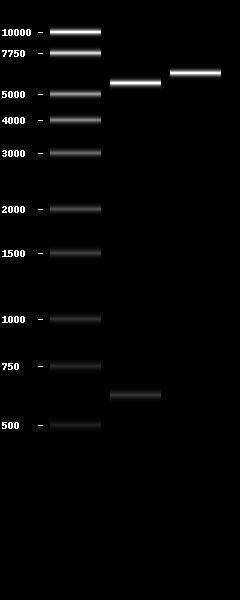

In [92]:
gel([PennStateLadder, pTA1.cut(Eco32I), pTA1.cut(EcoRI)])

![gel1](2019-10-31(2.2).png)

Loaded on gel from left to right:

1. pTA1 clone 7 µ828
2. pTA1 clone 8 µ928
3. pTA1 clone 9 µ929
4. pTA1 clone 7 Eco32I (EcoRV)
5. pTA1 clone 8 "
6. pTA1 clone 9 "
7. PennStateLadder
8. pTA1 clone 7 EcoRI
9. pTA1 clone 8 "
10. pTA1 clone 9 "

PennStateLadder
![PennStateLadder](PennStateLadder_small.png)


![gel2](2022-11-08.jpg)


Loaded on gel from left to right:

1. pTA1 cln#7
2. pTA1 cln#7 Acc65I   (no cut)
3. pTA1 cln#7 PstI     (no cut)
4. pTA1 cln#7 EcoR32I  (two cuts)
5. pTA1 cln#7 AflII    (two cuts)
6. pTA1 cln#8
7. pTA1 cln#8 Acc65I   
8. pTA1 cln#8 PstI    
9. pTA1 cln#8 EcoR32I
10. pTA1 cln#8 AflII
11. marcador
12. pTA1 cln#9
13. pTA1 cln#9 Acc65I  
14. pTA1 cln#9 PstI   
15. pTA1 cln#9 EcoR32I
16. pTA1 cln#9 AflII


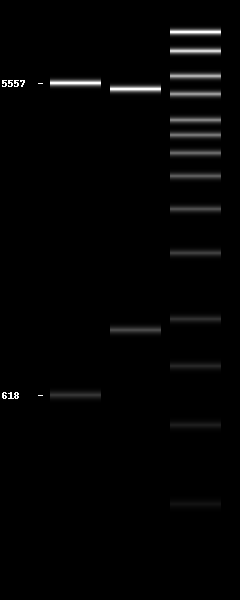

In [93]:
gel([ pTA1.cut(Eco32I), pTA1.cut(AflII), GeneRuler_1kb,])